In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
# Make sure 'Titanic-Dataset.csv' is in the same directory as your script
df = pd.read_csv("/content/drive/MyDrive/MLOps/Day 2/Titanic-Dataset.csv")

print("--- Original Data Head ---")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\n--- Original Data Info ---")
print(df.info())


--- Original Data Head ---
| PassengerId   | Survived   | Pclass   | Name                                                | Sex    | Age   | SibSp   | Parch   | Ticket           | Fare    | Cabin   | Embarked   |
|:--------------|:-----------|:---------|:----------------------------------------------------|:-------|:------|:--------|:--------|:-----------------|:--------|:--------|:-----------|
| 1             | 0          | 3        | Braund, Mr. Owen Harris                             | male   | 22    | 1       | 0       | A/5 21171        | 7.25    | nan     | S          |
| 2             | 1          | 1        | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female | 38    | 1       | 0       | PC 17599         | 71.2833 | C85     | C          |
| 3             | 1          | 3        | Heikkinen, Miss. Laina                              | female | 26    | 0       | 0       | STON/O2. 3101282 | 7.925   | nan     | S          |
| 4             | 1          | 1        | Futrel

In [7]:
# --- Data Cleaning ---

# Handle missing 'Age' values by imputing with the median
# The median is often preferred over the mean for skewed distributions or when outliers are present.
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop 'useless columns'
# 'PassengerId' is a unique identifier, not useful for analysis.
# 'Name' and 'Ticket' are specific identifiers and generally not used directly in this type of survival analysis.
# 'Cabin' has a very high number of missing values (over 77%), making it difficult to use without complex imputation.
# 'Embarked' has only 2 missing values, but for simplicity in this initial EDA, we'll drop it.
# If 'Embarked' was crucial, we would impute its missing values (e.g., with the mode).
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df.drop(columns_to_drop, axis=1, inplace=True)

print("\n--- Data Info After Cleaning Missing Age and Dropping Columns ---")
print(df.info())


--- Data Info After Cleaning Missing Age and Dropping Columns ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


/tmp/ipython-input-7-105568214.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [8]:
# --- Exploratory Data Analysis (EDA) ---

# 1. Survival rate by Pclass and Sex
survival_rate_pclass_sex = df.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()
print("\n--- Survival Rate by Pclass and Sex ---")
print(survival_rate_pclass_sex.to_markdown(index=False, numalign="left", stralign="left"))

# 2. Create Age Groups and calculate survival rate
# Define age bins for categorization
bins = [0, 12, 18, 60, np.inf] # 0-11 (Child), 12-17 (Teenager), 18-59 (Adult), 60+ (Elderly)
labels = ['Child', 'Teenager', 'Adult', 'Elderly']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

survival_rate_age_group = df.groupby('AgeGroup')['Survived'].mean().reset_index()
print("\n--- Survival Rate by Age Group ---")
# Ensure the AgeGroup order is preserved for printing and plotting
survival_rate_age_group['AgeGroup'] = pd.Categorical(survival_rate_age_group['AgeGroup'], categories=labels, ordered=True)
survival_rate_age_group = survival_rate_age_group.sort_values('AgeGroup')
print(survival_rate_age_group.to_markdown(index=False, numalign="left", stralign="left"))

# 3. Overall Survival Rate
overall_survival_rate = df['Survived'].mean()
print(f"\n--- Overall Survival Rate: {overall_survival_rate:.2f} ---")




--- Survival Rate by Pclass and Sex ---
| Pclass   | Sex    | Survived   |
|:---------|:-------|:-----------|
| 1        | female | 0.968085   |
| 1        | male   | 0.368852   |
| 2        | female | 0.921053   |
| 2        | male   | 0.157407   |
| 3        | female | 0.5        |
| 3        | male   | 0.135447   |

--- Survival Rate by Age Group ---
| AgeGroup   | Survived   |
|:-----------|:-----------|
| Child      | 0.573529   |
| Teenager   | 0.488889   |
| Adult      | 0.364362   |
| Elderly    | 0.269231   |

--- Overall Survival Rate: 0.38 ---


/tmp/ipython-input-8-3622185591.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_age_group = df.groupby('AgeGroup')['Survived'].mean().reset_index()


/tmp/ipython-input-9-2803717633.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=df, errorbar=None, palette='plasma')
/tmp/ipython-input-9-2803717633.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AgeGroup", y="Survived", data=df, errorbar=None, palette='cividis', order=labels) # Use 'order' to maintain consistent sorting


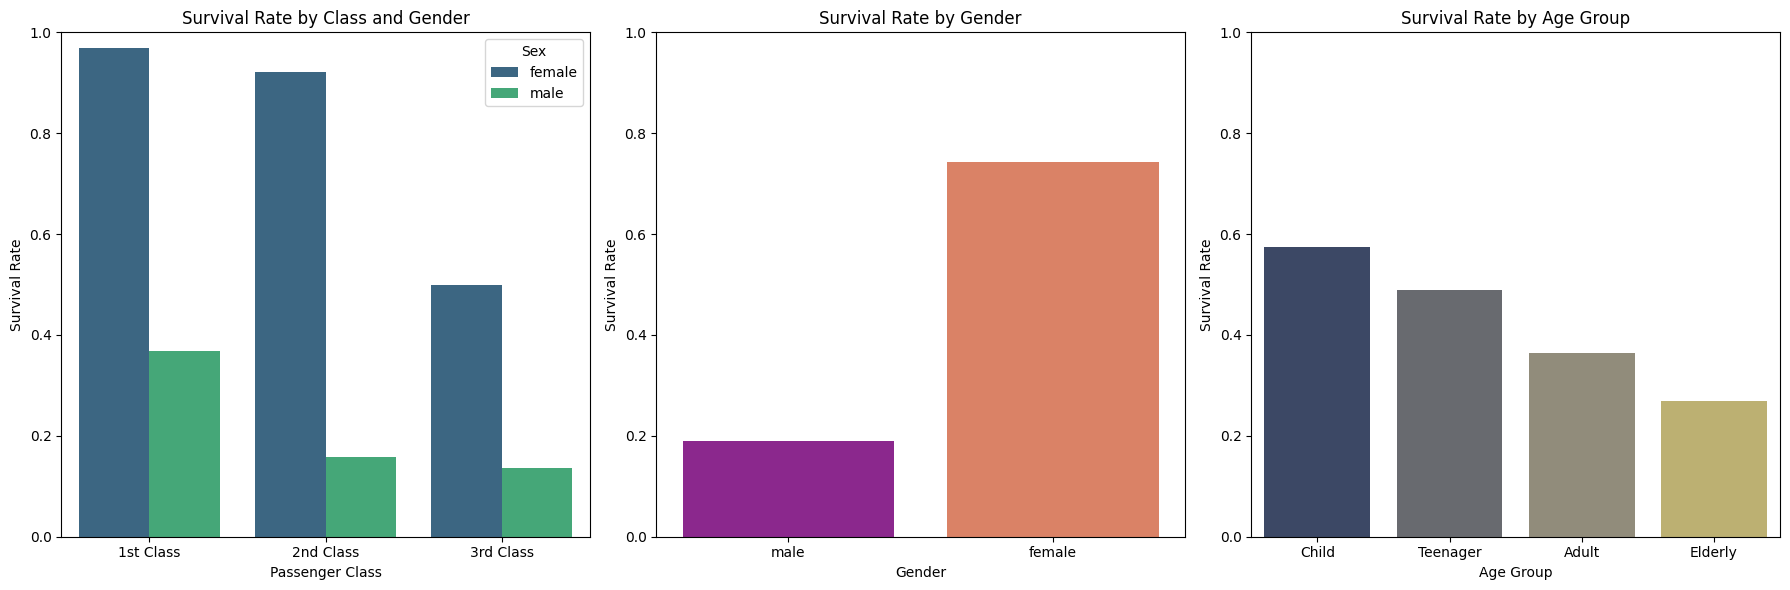


Cleaned data saved to 'titanic_cleaned.csv'

--- Cleaned Data Head ---
| Survived   | Pclass   | Sex    | Age   | SibSp   | Parch   | Fare    | Embarked   | AgeGroup   |
|:-----------|:---------|:-------|:------|:--------|:--------|:--------|:-----------|:-----------|
| 0          | 3        | male   | 22    | 1       | 0       | 7.25    | S          | Adult      |
| 1          | 1        | female | 38    | 1       | 0       | 71.2833 | C          | Adult      |
| 1          | 3        | female | 26    | 0       | 0       | 7.925   | S          | Adult      |
| 1          | 1        | female | 35    | 1       | 0       | 53.1    | S          | Adult      |
| 0          | 3        | male   | 35    | 0       | 0       | 8.05    | S          | Adult      |


In [9]:
# --- Visualizations ---

plt.figure(figsize=(18, 6))

# Plot 1: Survival rate by Class and Gender
plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df, errorbar=None, palette='viridis')
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for survival rate

# Plot 2: Survival rate by Gender (overall)
plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
sns.barplot(x="Sex", y="Survived", data=df, errorbar=None, palette='plasma')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for survival rate

# Plot 3: Survival rate by Age Group
plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
sns.barplot(x="AgeGroup", y="Survived", data=df, errorbar=None, palette='cividis', order=labels) # Use 'order' to maintain consistent sorting
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for survival rate

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.savefig('survival_rates_visualizations.png') # Save the combined plot
plt.show() # Display the plot

# --- Save the cleaned data ---
df.to_csv('titanic_cleaned.csv', index=False)
print("\nCleaned data saved to 'titanic_cleaned.csv'")
print("\n--- Cleaned Data Head ---")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

In [10]:
# Save the cleaned data
df.to_csv('titanic_cleaned.csv', index=False)
print("\nCleaned data saved to 'titanic_cleaned.csv'")
print("\n--- Cleaned Data Head ---")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))


Cleaned data saved to 'titanic_cleaned.csv'

--- Cleaned Data Head ---
| Survived   | Pclass   | Sex    | Age   | SibSp   | Parch   | Fare    | Embarked   | AgeGroup   |
|:-----------|:---------|:-------|:------|:--------|:--------|:--------|:-----------|:-----------|
| 0          | 3        | male   | 22    | 1       | 0       | 7.25    | S          | Adult      |
| 1          | 1        | female | 38    | 1       | 0       | 71.2833 | C          | Adult      |
| 1          | 3        | female | 26    | 0       | 0       | 7.925   | S          | Adult      |
| 1          | 1        | female | 35    | 1       | 0       | 53.1    | S          | Adult      |
| 0          | 3        | male   | 35    | 0       | 0       | 8.05    | S          | Adult      |
